### Importación de datos



In [9]:
import pandas as pd
%pip install matplotlib
import matplotlib.pyplot as plt



url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)


tienda.head()

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\edtom\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


# 0. Exploración de datos

El conjunto de datos incluye la siguiente información:

* **Producto y Categoría:** Artículos vendidos y sus calificaciones.
* **Precio y Envío:** Valores de venta y costos asociados.
* **Fecha y ubicación de compra:** Información temporal y geográfica.
* **Evaluación de compra:** Comentarios de clientes.
* **Tipo de Pago y Cuotas:** Métodos utilizados por los clientes.
* **Coordenadas Geográficas:** Ubicación de las transacciones.

Podemos observar que todos los archivos incluyen las mismas columnas en el siguiente código, también resalta que todos, a exepción de la tienda 4, tienen el mismo número de filas. 

In [14]:
# creamos una lista con las tiendas 
tiendas = [tienda, tienda2, tienda3, tienda4] 

# obtenemos el nombre de las columnas de la primer tienda para usarla como referencia
columnas_referencia = set(tiendas[0].columns)

# verificamos si las demás tiendas tienen la misma columan
for i, df in enumerate(tiendas[1:], start=2):
    columnas_actual = set(df.columns)
    if columnas_actual == columnas_referencia:
        print(f'Tienda {i}: columnas iguales a la tienda 1 ✅')
    else:
        print(f'Tienda {i}: columnas diferentes a la tienda 1 ❌')
        print(f"Diferencias: {columnas_referencia.symmetric_difference(columnas_actual)}") #muestrá que columnas son diferentes
        


Tienda 2: columnas iguales a la tienda 1 ✅
Tienda 3: columnas iguales a la tienda 1 ✅
Tienda 4: columnas iguales a la tienda 1 ✅


In [ ]:
#recuento de filas y columnas
for i, df in enumerate(tiendas, start=1):
    filas, columnas = df.shape
    print(f"Tienda {i}: {filas} filas, {columnas} columnas")

Tienda 1: 2359 filas, 12 columnas
Tienda 2: 2359 filas, 12 columnas
Tienda 3: 2359 filas, 12 columnas
Tienda 4: 2358 filas, 12 columnas


Analistando el tipo de datos de cada columna observamos que la columna "Fecha de Compra" tiene un tipo de dato "object" por lo que se cambiará para su manipulación a un tipo "datetime"

In [24]:
tienda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                2359 non-null   object 
 1   Categoría del Producto  2359 non-null   object 
 2   Precio                  2359 non-null   float64
 3   Costo de envío          2359 non-null   float64
 4   Fecha de Compra         2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Lugar de Compra         2359 non-null   object 
 7   Calificación            2359 non-null   int64  
 8   Método de pago          2359 non-null   object 
 9   Cantidad de cuotas      2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.3+ KB


In [32]:
tienda["Fecha de Compra"] = pd.to_datetime(df['Fecha de Compra'], format="%d/%m/%Y")
tienda2["Fecha de Compra"] = pd.to_datetime(df['Fecha de Compra'], format="%d/%m/%Y")
tienda3["Fecha de Compra"] = pd.to_datetime(df['Fecha de Compra'], format="%d/%m/%Y")
tienda4["Fecha de Compra"] = pd.to_datetime(df['Fecha de Compra'], format="%d/%m/%Y")

tienda4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2358 entries, 0 to 2357
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Producto                2358 non-null   object        
 1   Categoría del Producto  2358 non-null   object        
 2   Precio                  2358 non-null   float64       
 3   Costo de envío          2358 non-null   float64       
 4   Fecha de Compra         2358 non-null   datetime64[ns]
 5   Vendedor                2358 non-null   object        
 6   Lugar de Compra         2358 non-null   object        
 7   Calificación            2358 non-null   int64         
 8   Método de pago          2358 non-null   object        
 9   Cantidad de cuotas      2358 non-null   int64         
 10  lat                     2358 non-null   float64       
 11  lon                     2358 non-null   float64       
 12  fecha                   2358 non-null   datetime

In [ ]:
#Obtenemos los valores mínimos y máximos de fechas para conocer el período de tiempo que abarca.
print(tienda["Fecha de Compra"].min())
print(tienda["Fecha de Compra"].max())

2020-01-01 00:00:00
2023-03-30 00:00:00


# 1. Análisis de facturación



Obtenemos la suma total de la columna 'Precio':

In [ ]:
#Calcular el ingreso total para cada tienda
for i, df in enumerate(tiendas, start=1):
    suma_precio = df["Precio"].sum()
    print(f'Tinda {i}: suma total de "Precio" =${suma_precio:,.2f}')


Tinda 1: suma total de "Precio" =$1,150,880,400.00
Tinda 2: suma total de "Precio" =$1,116,343,500.00
Tinda 3: suma total de "Precio" =$1,098,019,600.00
Tinda 4: suma total de "Precio" =$1,038,375,700.00


## Gráfica

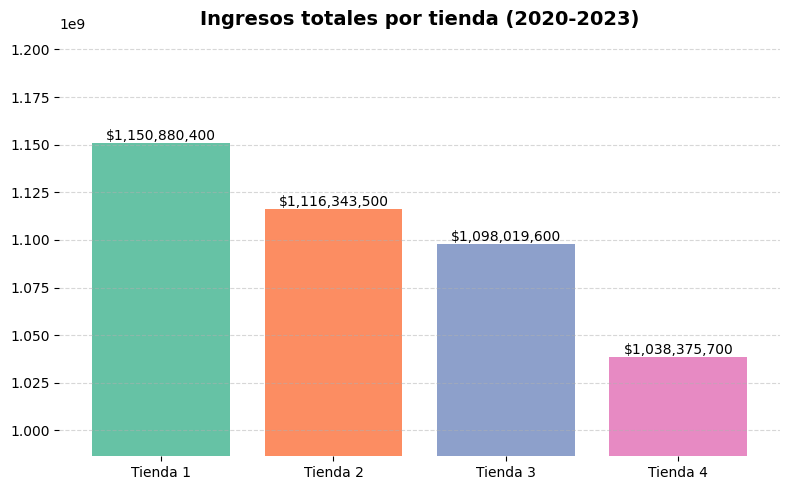

In [82]:
# Lista de tiendas y nombres
nombres_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
sumas = []

# Calcular la suma del precio por tienda
for df in tiendas:
    suma_precio = df["Precio"].sum()
    sumas.append(suma_precio)

#Creación del gráfico de barras
plt.figure(figsize=(8,5))
bar_colors=plt.get_cmap('Set2').colors  # Lista de colores
plt.bar(nombres_tiendas, sumas, color=bar_colors[:len(nombres_tiendas)])
plt.title("Ingresos totales por tienda (2020-2023)", fontsize=14, weight='bold') #Título del gráfico
plt.grid(axis='y', linestyle='--', alpha=0.5) #Añade una cuadrícula en el eje y con líneas discontinuas
#plt.ylabel("Suma de Precio ($)")
plt.xticks(rotation=0)

# Añade un límite inferior en el eje y para visualisar mejor la diferencia 
minimo = min(sumas)
ajuste = minimo * 0.95  # empieza un 5% más abajo
plt.ylim(ajuste)

# Elimina las barras de los bordes
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# Añade etiquetas en las barras
for i, valor in enumerate(sumas):
    plt.text(i, valor, f"${valor:,.0f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()

# 2. Ventas por categoría

Se calculará la **cantidad de producto vendido** por **categoría** en cada tienda. 

El dataframe final se ordena a la tienda 1 ya que fue la más ventas tuvo. 

In [90]:
# Lista de tiendas y nombres
nombres_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

# Lista para almacenar los Dataframes de cada tienda
conteo_tienda = []


for i, df in enumerate(tiendas, start=1):
    #agrupa por la columna 'Categoría del Producto' y cuenta el producto
    suma_por_categoria = df.groupby('Categoría del Producto').size().reset_index(name=nombres_tiendas[i-1])
    conteo_tienda.append(suma_por_categoria)

#concatenación de los dataframes en uno solo, alineado por 'Categoría del Producto'
total_conteo_tiendas = pd.concat(conteo_tienda, axis = 1).loc[:,~pd.concat(conteo_tienda, axis=1).columns.duplicated()]

# Ordenar los resultados por el conteo de productos en 'Tienda 1' 
total_conteo_tiendas = total_conteo_tiendas.sort_values(by=nombres_tiendas[0], ascending=False)

print(total_conteo_tiendas)


    Categoría del Producto  Tienda 1  Tienda 2  Tienda 3  Tienda 4
7                  Muebles       465       442       499       480
3             Electrónicos       448       422       451       451
5                 Juguetes       324       313       315       338
2        Electrodomésticos       312       305       278       254
1     Deportes y diversión       284       275       277       277
4   Instrumentos musicales       182       224       177       170
6                   Libros       173       197       185       187
0  Artículos para el hogar       171       181       177       201


## Gráfica

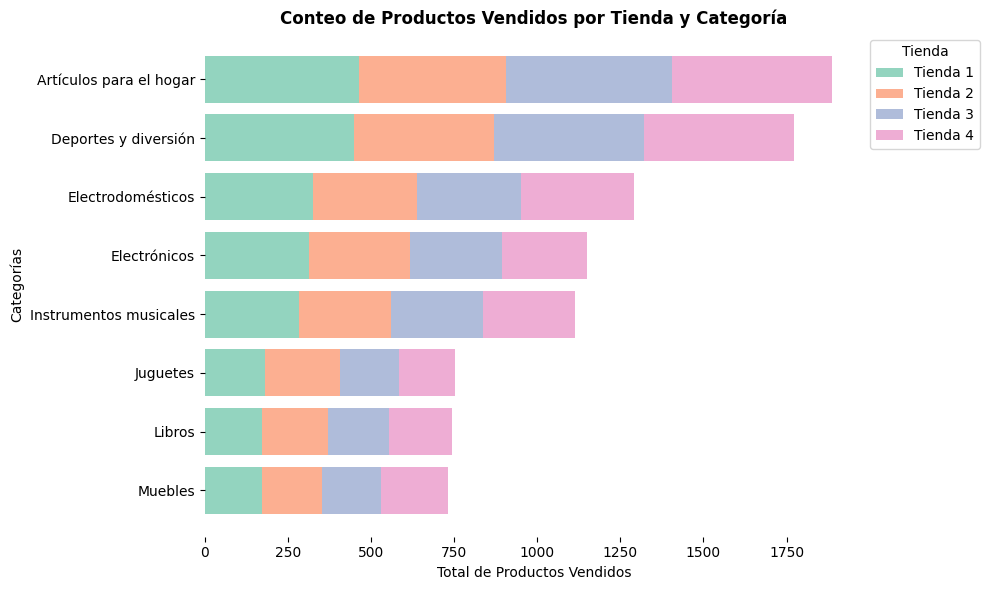

In [102]:
import numpy as np 

# Lista de tiendas
nombres_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

# Creación del gráfico
plt.figure(figsize=(10, 6))

# Establecer los colores
bar_colors = plt.get_cmap('Set2').colors

# Obtener las categorías de productos
categorias = total_conteo_tiendas['Categoría del Producto']

#Conteo por tiendas
conteos = total_conteo_tiendas[nombres_tiendas].values

# calculamos el total para ordenar
total_por_categoria = conteos.sum(axis=1)

# ordenamos categorías y conteos
indices_ordenaos = np.argsort(total_por_categoria)
categorias_ordenadas = categorias[indices_ordenaos]
conteos_ordenados= conteos[indices_ordenaos, :]

# Establece el ancho de las barras
width = 0.8

# Iniciamos la variable para la base del apilamiento en la gráfica
bottom = np.zeros(len(categorias_ordenadas))

# Trazo las barras apiladas para cada tienda
for i, tienda in enumerate(nombres_tiendas):
    plt.barh(
             categorias_ordenadas, 
             conteos_ordenados[:, i],
             height=width, 
             label=tienda, 
             color=bar_colors[i],
             alpha=0.7, 
             left=bottom)
    bottom += conteos_ordenados[:,i] #incrementamos la base para la siguiente tienda

# Títulos
plt.title("Conteo de Productos Vendidos por Tienda y Categoría", fontsize=12, weight='bold')
plt.xlabel("Total de Productos Vendidos", fontsize=10)
plt.ylabel("Categorías", fontsize=10)

# Agregar leyenda
plt.legend(title="Tienda", loc="upper left", bbox_to_anchor=(1, 1))

# Elimina las barras de los bordes
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

# 3. Calificación promedio de la tienda


En este paso, se calculará las **calificaciones promedio** de los clientes para cada tienda. 
Con el objetivo de conocer la satisfacción del cliente con los productos vendidos. 

In [121]:
#Calcular la calificación promedio  para cada tienda
for i, df in enumerate(tiendas, start=1):
    calificacion_promedio = df["Calificación"].mean()
    print(f'Tinda {i}: promedio de Calificación" = {calificacion_promedio:,.2f}')

Tinda 1: promedio de Calificación" = 3.98
Tinda 2: promedio de Calificación" = 4.04
Tinda 3: promedio de Calificación" = 4.05
Tinda 4: promedio de Calificación" = 4.00


## Gráfica

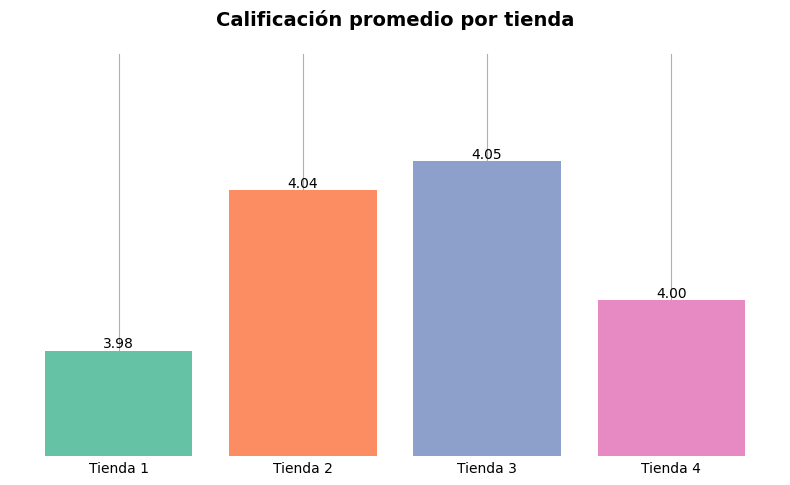

In [143]:
# Lista de tiendas y nombres
nombres_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
promedios = []

# Calcular el promedio de calificación por tienda
for df in tiendas:
    promedio_calificacion = df["Calificación"].mean()
    promedios.append(promedio_calificacion)

#Creación del gráfico de barras
plt.figure(figsize=(8,5))
bar_colors=plt.get_cmap('Set2').colors  # Lista de colores
plt.bar(nombres_tiendas, promedios, color=bar_colors[:len(nombres_tiendas)])
plt.title("Calificación promedio por tienda", fontsize=14, weight='bold', y = 1.05) #Título del gráfico
#plt.title("Calificación Máx: 5 Min: 0",fontsize=10, style='italic', pad=10)

plt.grid(axis='y', linestyle='--', alpha=0.5) #Añade una cuadrícula en el eje y con líneas discontinuas
plt.xticks(rotation=0)

# Elimina las barras de los bordes
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# Añade etiquetas en las barras
for i, valor in enumerate(promedios):
    plt.text(i, valor, f"{valor:.2f}", ha='center', va='bottom')

# Quitmaos el eje y ya que no aporta nada
plt.yticks([])

# Añade un límite inferior en el eje y para visualisar mejor la diferencia 
minimo = min(promedios)
maximo = max(promedios)
ajuste = minimo * 0.99  # empieza un 1% más abajo
ajuste_2 = maximo * 1.01 # termina un 1% más arriba
plt.ylim(ajuste, ajuste_2)

plt.tight_layout()
plt.show()


# 4. Productos más y menos vendidos

Identificaremos qué productos fueron los más vendidos y los mendos vendidos en cada tienda. 
Además de que agregarémos una gráfica para que quede claro qué productos destacaron enn ventas en cada tienda. 

In [164]:

# Agrupamos las url's en un diccionario
urls = {
    'Tienda 1': "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv",
    'Tienda 2': "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv",
    'Tienda 3': "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv",
    'Tienda 4': "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"
}

# Creamos lista para almacenar los DataFrames
dfs = []

for nombre_tienda, url in urls.items():
    df = pd.read_csv(url)
    df.insert(0, 'Tienda', nombre_tienda)  # Agregar columna con nombre de tienda
    dfs.append(df)

# Combinar todos los DataFrames
tiendas_completo = pd.concat(dfs, ignore_index=True)

# Verificamos el resultado
print(tiendas_completo.head())

     Tienda           Producto Categoría del Producto    Precio  \
0  Tienda 1  Asistente virtual           Electrónicos  164300.0   
1  Tienda 1    Mesa de comedor                Muebles  192300.0   
2  Tienda 1      Juego de mesa               Juguetes  209600.0   
3  Tienda 1         Microondas      Electrodomésticos  757500.0   
4  Tienda 1   Silla de oficina                Muebles  335200.0   

   Costo de envío Fecha de Compra         Vendedor Lugar de Compra  \
0          6900.0      16/01/2021      Pedro Gomez          Bogotá   
1          8400.0      18/05/2022  Beatriz Morales        Medellín   
2         15900.0      15/03/2021   Juan Fernandez       Cartagena   
3         41000.0      03/05/2022   Juan Fernandez            Cali   
4         20200.0      07/11/2020    Maria Alfonso        Medellín   

   Calificación      Método de pago  Cantidad de cuotas       lat       lon  
0             4  Tarjeta de crédito                   8   4.60971 -74.08175  
1             1  Tar

In [167]:
# Producto más vendido
productos_mas_vendidos = (tiendas_completo
                         .groupby(['Tienda', 'Producto'])
                         .size()
                         .reset_index(name='Cantidad')
                         .sort_values(['Tienda', 'Cantidad'], ascending=[True, False])
                         .groupby('Tienda')
                         .head(1))

print("\nProductos más vendidos por tienda:")
print(productos_mas_vendidos[['Tienda', 'Producto', 'Cantidad']])


Productos más vendidos por tienda:
       Tienda                   Producto  Cantidad
1    Tienda 1                    Armario        60
75   Tienda 2  Iniciando en programación        65
129  Tienda 3              Kit de bancas        57
163  Tienda 4                   Cama box        62


In [168]:
# producto menos vendido
productos_menos_vendidos = (tiendas_completo
                            .groupby(['Tienda', 'Producto'])
                            .size()
                            .reset_index(name='Cantidad')
                            .sort_values(['Tienda', 'Cantidad'], ascending=[True, True])
                            .groupby('Tienda')
                            .head(1))

print("\nProductos menos vendidos por tienda:")
print(productos_menos_vendidos[['Tienda', 'Producto', 'Cantidad']])


Productos menos vendidos por tienda:
       Tienda                   Producto  Cantidad
4    Tienda 1  Auriculares con micrófono        33
77   Tienda 2              Juego de mesa        32
111  Tienda 3    Bloques de construcción        35
175  Tienda 4         Guitarra eléctrica        33


# 5. Envío promedio por tienda